# Introduction to Flux Balance Analysis

Orth, Jeffrey D., Ines Thiele, and Bernhard Ø. Palsson. "What is flux balance analysis?." Nature biotechnology 28.3 (2010): 245-248.

In short, flux balance analysis is a way to take into account and exploit the constraints that stoichiometric relations in metabolic reactions impose on the possible states of the entire metabolism. Additionally, metabolism is made to produce an approximation of the biomass through what is called the "biomass reaction". This biomass equation ensures that the demands on the metabolism are realistic.
Typically, in FBA, it is the flux through the biomass reaction that is maximized.

In [22]:
import cobra
from cobra.io import load_model, read_sbml_model, write_sbml_model
import pandas as pd

config = cobra.Configuration()
config.solver = "glpk"

In [7]:
model = read_sbml_model('e_coli_core.xml')
model

Name,e_coli_core
Memory address,7f6752aa5b70
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Compartments,"extracellular space, cytosol"


## What is the objective function?

We notice that the objective function is written in Cobra as the difference of the forward and backward direction of the flux through the biomass reaction. This is only a convention and serves to be able to both minimize and maximize it, depending on the user specification.

In [8]:
print(model.objective.expression)
print(model.objective.direction)

1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
max


## What is the biomass reaction?

In [9]:
biomass_reaction = model.reactions.get_by_id('BIOMASS_Ecoli_core_w_GAM')
biomass_reaction

Reaction identifier,BIOMASS_Ecoli_core_w_GAM
Name,Biomass Objective Function with GAM
Memory address,0x7f67524262c0
Stoichiometry,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c... 1.496 3-Phospho-D-glycerate + 3.7478 Acetyl-CoA + 59.81 ATP C10H12N5O13P3 + 0.361 D-Erythrose 4-phosphate + 0.0709 D-Fructose 6-phosphate + 0.129 Glyceraldehyde 3-phosphate + 0.205 D-Glucose...
GPR,
Lower bound,0.0
Upper bound,1000.0


In [10]:
biomass_met_df = pd.DataFrame(columns=('Metabolite ID', 'Metabolite name', 'Formula', 'Stoichiometry'))

for met in biomass_reaction.reactants:
    biomass_met_df = biomass_met_df.append(pd.Series([met.id, met.name, met.formula, biomass_reaction.get_coefficient(met.id)],
                             index=biomass_met_df.columns),
                             ignore_index=True)

for met in biomass_reaction.products:
    biomass_met_df = biomass_met_df.append(pd.Series([met.id, met.name, met.formula, biomass_reaction.get_coefficient(met.id)],
                             index=biomass_met_df.columns),
                             ignore_index=True)
    
biomass_met_df.set_index('Metabolite ID', inplace=True)
biomass_met_df


,Metabolite name,Formula,Stoichiometry
Metabolite ID,,,
3pg_c,3-Phospho-D-glycerate,C3H4O7P,-1.4960
accoa_c,Acetyl-CoA,C23H34N7O17P3S,-3.7478
atp_c,ATP C10H12N5O13P3,C10H12N5O13P3,-59.8100
e4p_c,D-Erythrose 4-phosphate,C4H7O7P,-0.3610
f6p_c,D-Fructose 6-phosphate,C6H11O9P,-0.0709
g3p_c,Glyceraldehyde 3-phosphate,C3H5O6P,-0.1290
g6p_c,D-Glucose 6-phosphate,C6H11O9P,-0.2050
gln__L_c,L-Glutamine,C5H10N2O3,-0.2557
glu__L_c,L-Glutamate,C5H8NO4,-4.9414


## How can we inspect any metabolite or any reaction?

In [11]:
hydrogen_ion = model.metabolites.get_by_id('h_c')
hydrogen_ion

Metabolite identifier,h_c
Name,H+
Memory address,0x7f6752abd300
Formula,H
Compartment,c
In 35 reaction(s),"GLNS, GLUDy, GLNabc, PGL, ATPS4r, BIOMASS_Ecoli_core_w_GAM, MDH, PFK, FUMt2_2, LDH_D, SUCCt3, CS, FORt2, GLUt2r, ALCD2x, ACALD, PIt2r, PYRt2, GAPD, THD2, PPC, ETOHt2r, ATPM, MALS, PPS, PYK, ACt2r,..."


In [12]:
PGI_reaction = model.reactions.get_by_id('PGI')
PGI_reaction

Reaction identifier,PGI
Name,Glucose-6-phosphate isomerase
Memory address,0x7f67527a8430
Stoichiometry,g6p_c <=> f6p_c D-Glucose 6-phosphate <=> D-Fructose 6-phosphate
GPR,b4025
Lower bound,-1000.0
Upper bound,1000.0


## Simple exercise
Write a code which extracts all the information for the hydrogen ion that you see printed above. Additionally, for each reaction in which it appears, write the stoichiometry (negative for substrates, positive for products).

In [13]:
for h_reac in hydrogen_ion.reactions:
    print(h_reac.id, h_reac.get_coefficient('h_c'), '({})'.format(h_reac.name))

GLNS 1.0 (Glutamine synthetase)
GLUDy 1.0 (Glutamate dehydrogenase (NADP))
GLNabc 1.0 (L-glutamine transport via ABC system)
PGL 1.0 (6-phosphogluconolactonase)
ATPS4r 3.0 (ATP synthase (four protons for one ATP))
BIOMASS_Ecoli_core_w_GAM 59.81 (Biomass Objective Function with GAM)
MDH 1.0 (Malate dehydrogenase)
PFK 1.0 (Phosphofructokinase)
FUMt2_2 2.0 (Fumarate transport via proton symport (2 H))
LDH_D 1.0 (D-lactate dehydrogenase)
SUCCt3 1.0 (Succinate transport out via proton antiport)
CS 1.0 (Citrate synthase)
FORt2 1.0 (Formate transport in via proton symport)
GLUt2r 1.0 (L glutamate transport via proton symport  reversible)
ALCD2x 1.0 (Alcohol dehydrogenase (ethanol))
ACALD 1.0 (Acetaldehyde dehydrogenase (acetylating))
PIt2r 1.0 (Phosphate reversible transport via symport)
PYRt2 1.0 (Pyruvate transport in via proton symport)
GAPD 1.0 (Glyceraldehyde-3-phosphate dehydrogenase)
THD2 2.0 (NAD(P) transhydrogenase)
PPC 1.0 (Phosphoenolpyruvate carboxylase)
ETOHt2r 1.0 (Ethanol rever

## Exchange reactions

Every FBA model has to have exchange reactions (uptake and excretion reactions). This is needed because metabolism needs to be at steady state, meaning that no metabolite can be accumulated or depleted. If there are no exchange reactions, this can happen only when all the fluxes are zero, which is not a particularily interesting case. For all other cases, there needs to be some exchange with the environment (both uptake and excretion).

These exchange reactions also inform us of what can be present in our simulated medium (what can be taken up).

In [15]:
for ex_reac in model.exchanges:
    print(ex_reac.reactants[0].name)

Acetate
Acetaldehyde
2-Oxoglutarate
CO2 CO2
Ethanol
Formate
D-Fructose
Fumarate
D-Glucose
L-Glutamine
L-Glutamate
H+
H2O H2O
D-Lactate
L-Malate
Ammonium
O2 O2
Phosphate
Pyruvate
Succinate


## Which of these metabolites are available in the medium?

Not all the metabolites, however, need to be present in the medium. Often we are interested in minimal (chemicaly defined) media. Let's check what is available by default for this E. coli model.


In [16]:
model.medium

{'EX_co2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0}

# Simulation
Now we are going to simulate our model for growth on glucose. The simulation is an optimization procedure on a linear programming class of problem. 
There are two main parts to what the solver will give us as result: the numeric prediction of the network state, and the solver status which informs us on whether the solver managed to find the optimal solution or not.

In [17]:
result_glc_o2 = model.optimize()
result_glc_o2

,fluxes,reduced_costs
PFK,7.477382,1.084202e-18
PFL,0.000000,-1.527746e-02
PGI,4.860861,0.000000e+00
PGK,-16.023526,-2.602085e-18
PGL,4.959985,0.000000e+00
...,...,...
NADH16,38.534610,4.336809e-19
NADTRHD,0.000000,-2.546243e-03
NH4t,4.765319,0.000000e+00
O2t,21.799493,0.000000e+00


# How can we visualize the results?

There is a website (https://escher.github.io/#/) which allows you to plot the flux distributions of FBA models.
The flux distribution you wish to visualize needs to be exported in JSON format. 

For the visualization, we need to choose the `e_coli_core` model, and then `Data -> Load reaction data`, and choose the JSON file we have generated.

In [18]:
result_glc_o2.fluxes.to_json('simulation_result_glucose.json')

# How can we change the medium?

We saw that oxygen was available in our medium. What if we want to analyze the metabolic fluxes under the anaerobic growth condition?

In [19]:
medium = model.medium
medium['EX_o2_e'] = 0
model.medium = medium

result_anaerobic = model.optimize()
result_anaerobic.fluxes.to_json('simulation_result_anaerobic_glucose.json')
result_anaerobic

,fluxes,reduced_costs
PFK,9.789459,2.602085e-18
PFL,17.804674,0.000000e+00
PGI,9.956609,0.000000e+00
PGK,-19.437336,-0.000000e+00
PGL,0.000000,0.000000e+00
...,...,...
NADH16,0.000000,-5.538015e-03
NADTRHD,0.000000,-1.107603e-02
NH4t,1.154156,0.000000e+00
O2t,0.000000,0.000000e+00


# Let E. coli grow aerobically on pyruvate!

In [20]:
# try it out yourselves

# Different growth substrates

By adding one metabolite at a time to the `aerobic_medium`, find those which enable the E. coli model to grow with growth rate > 0. Enable the influx of each metabolite to be maximum of 10.
Make a pandas dataframe from results containing the ID and name of the carbon source, the growth rate and the oxygen uptake rate. Store only the simulation results for which the solver returns the status `optimal`.

In [16]:
aerobic_medium = {'EX_co2_e': 1000.0,
                 'EX_h_e': 1000.0,
                 'EX_h2o_e': 1000.0,
                 'EX_nh4_e': 1000.0,
                 'EX_o2_e': 1000.0,
                 'EX_pi_e': 1000.0}

simulation_df = pd.DataFrame(columns=('Carbon source', 'Formula', 'Carbon uptake', 'Growth rate', 'Oxygen uptake'))

def get_carbon_count(chemical_formula):
    num = chemical_formula[1]
    if num.isdigit():
        return int(num)
    else:
        return 1
        

for ex_reac in model.exchanges:
    if ex_reac.id in aerobic_medium:
        continue
    cc = get_carbon_count(ex_reac.reactants[0].formula)
    # adding to the medium
    aerobic_medium[ex_reac.id] = 10
    model.medium = aerobic_medium
    # simulating
    tmp_result = model.optimize()
    if tmp_result.status == 'infeasible':
        aerobic_medium.pop(ex_reac.id)
        continue
    
    # storing the results
    simulation_df = simulation_df.append(pd.Series([ex_reac.reactants[0].name,
                                    ex_reac.reactants[0].formula,                
                                   tmp_result.fluxes[ex_reac.id],
                                   tmp_result.objective_value,
                                   tmp_result.fluxes['EX_o2_e']],
                                   index=simulation_df.columns),
                         ignore_index=True)
    # removing from the medium
    aerobic_medium.pop(ex_reac.id)

simulation_df.sort_values('Growth rate', ascending=False)
    

/home/ana/.local/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


,Carbon source,Formula,Carbon uptake,Growth rate,Oxygen uptake
4,D-Fructose,C6H12O6,-10.0,0.873922,-21.799493
6,D-Glucose,C6H12O6,-10.0,0.873922,-21.799493
8,L-Glutamate,C5H8NO4,-10.0,0.598732,-18.828478
7,L-Glutamine,C5H10N2O3,-10.0,0.559265,-20.553626
2,2-Oxoglutarate,C5H4O5,-10.0,0.528755,-16.887255
12,Succinate,C4H4O4,-10.0,0.397563,-17.621884
5,Fumarate,C4H2O4,-10.0,0.370741,-13.794339
10,L-Malate,C4H4O5,-10.0,0.370741,-13.794339
9,D-Lactate,C3H5O3,-10.0,0.350311,-14.687340
3,Ethanol,C2H6O,-10.0,0.330420,-15.556822


## Growth rates for different carbon substrates

Here we provide the experimentally measured data for the growth on different  carbon substrates.
Use the defined carbon uptake to constrain the FBA model and compare the  obtained growth rate to the experimentally determined one.

The source of data: https://bionumbers.hms.harvard.edu/files/Growth%20parameters%20of%20E.%20coli%20growing%20on%20different%20carbon%20sources.pdf

In [21]:
carbon_source_exp_df=pd.DataFrame()
carbon_source_exp_df['Carbon source']=['D-Glucose','Pyruvate','D-Lactate','Acetate','Succinate','Fumarate']
carbon_source_exp_df['Carbon number']=[6,3,3,2,4,4]
carbon_source_exp_df['Growth rate']=[0.89,0.48,0.52,0.3,0.36,0.36,]
carbon_source_exp_df['Yield on carbon']=[11.8,4.9,7.8,11.7,9.5,7.2]
carbon_source_exp_df['Oxygen uptake']=[19.8,29.9,32.2,18,23.1,17.1]
carbon_source_exp_df['Carbon uptake']=1000*carbon_source_exp_df['Growth rate']/(carbon_source_exp_df['Carbon number']*carbon_source_exp_df['Yield on carbon'])
carbon_source_exp_df['Carbon uptake (unscaled)']=1000*carbon_source_exp_df['Growth rate']/(carbon_source_exp_df['Yield on carbon'])
carbon_source_exp_df.index=['EX_glc__D_e','EX_pyr_e','EX_lac__D_e','EX_ac_e','EX_succ_e','EX_fum_e']
carbon_source_exp_df

,Carbon source,Carbon number,Growth rate,Yield on carbon,Oxygen uptake,Carbon uptake,Carbon uptake (unscaled)
EX_glc__D_e,D-Glucose,6,0.89,11.8,19.8,12.570621,75.423729
EX_pyr_e,Pyruvate,3,0.48,4.9,29.9,32.653061,97.959184
EX_lac__D_e,D-Lactate,3,0.52,7.8,32.2,22.222222,66.666667
EX_ac_e,Acetate,2,0.30,11.7,18.0,12.820513,25.641026
EX_succ_e,Succinate,4,0.36,9.5,23.1,9.473684,37.894737
EX_fum_e,Fumarate,4,0.36,7.2,17.1,12.500000,50.000000


In [18]:
aerobic_medium = {'EX_co2_e': 1000.0,
                 'EX_h_e': 1000.0,
                 'EX_h2o_e': 1000.0,
                 'EX_nh4_e': 1000.0,
                 'EX_o2_e': 1000.0,
                 'EX_pi_e': 1000.0}

for ex_reac in carbon_source_exp_df.index:
    if ex_reac in aerobic_medium:
        continue
    # adding to the medium
    aerobic_medium[ex_reac] = -carbon_source_exp_df.loc[ex_reac,'Carbon uptake']
    model.medium = aerobic_medium
    # simulating
    tmp_result = model.optimize()
    if tmp_result.status == 'infeasible':
        aerobic_medium.pop(ex_reac)
        continue
    
    # storing the results
    carbon_source_exp_df.loc[ex_reac,'Growth rate (sim)']=tmp_result.objective_value
    carbon_source_exp_df.loc[ex_reac,'Oxygen uptake (sim)']=-tmp_result.fluxes['EX_o2_e']
    aerobic_medium.pop(ex_reac)


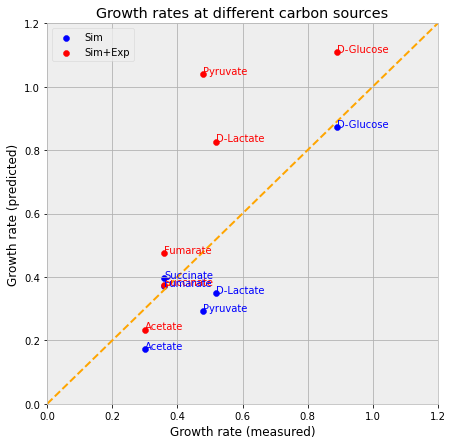

In [43]:
import matplotlib.pyplot as plt
# simulation_df.plot.scatter(x='Oxygen uptake', y='Growth rate')

growth_rate_simulated_originally=[]
for ex_reac in carbon_source_exp_df.index:
    species=carbon_source_exp_df.loc[ex_reac,'Carbon source']
    growth_rate_simulated_originally.append(simulation_df.loc[simulation_df['Carbon source']==species,'Growth rate'].values[0])

fig = plt.figure(figsize=(7,7))
plt.plot([0, 1.2], [0, 1.2],'--', color='orange')
plt.scatter(carbon_source_exp_df['Growth rate'],growth_rate_simulated_originally,color='blue',label='Sim')
plt.scatter(carbon_source_exp_df['Growth rate'],carbon_source_exp_df['Growth rate (sim)'],color='red',label='Sim+Exp')
plt.legend()
for i, txt in enumerate(carbon_source_exp_df['Carbon source']):
    plt.annotate(txt, (list(carbon_source_exp_df['Growth rate'])[i], 
                       list(carbon_source_exp_df['Growth rate (sim)'])[i]),color='red')
    plt.annotate(txt, (list(carbon_source_exp_df['Growth rate'])[i], 
                       growth_rate_simulated_originally[i]),color='blue')
plt.xlabel('Growth rate (measured)')
plt.ylabel('Growth rate (predicted)')
plt.xlim([0, 1.2])
plt.ylim([0, 1.2])
plt.title('Growth rates at different carbon sources')
plt.show()

## Gene and reaction knockouts

Let's first knock-out individually the enolase and phophoglycarate mutase (lower glycolysis). What is the growth rate for the two knock-outs? 
The `with model:` environment serves to have the knock-outs isolated, and after the `with` environment the model is restored to its original state.

In [20]:
# Let's return the medium to glucose aerobic
aerobic_medium['EX_glc__D_e'] = 10
model.medium = aerobic_medium

print('Complete model (glucose, aerobic):', model.optimize())

Complete model (glucose, aerobic): <Solution 0.874 at 0x7fd30bdf3df0>


In [21]:
with model:
    model.reactions.ENO.knock_out()
    print('ENO knock-out:', model.optimize())
    
with model:
    model.reactions.PGI.knock_out()
    print('PGI knock-out:', model.optimize())

ENO knock-out: <Solution 0.000 at 0x7fd30bdf3e80>
PGI knock-out: <Solution 0.863 at 0x7fd30bdf3e80>


In [22]:
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

In [23]:
with model:
    model.reactions.NADH16.knock_out()
    print('Knock-out:', model.optimize())
    
with model:
    model.genes.b4025.knock_out()
    result = model.optimize()
    print('Gene knock-out', result, result.status)

Knock-out: <Solution 0.212 at 0x7fd30bdf3250>
Gene knock-out <Solution 0.863 at 0x7fd30bdf3820> optimal


# Tasks

## Growth rates at different glucose uptake rates

Here we give you experimental data from https://bionumbers.hms.harvard.edu/files/Biomass%20formation%20rate%20and%20the%20specific%20rates%20of%20glucose%20uptake,%20carbon%20dioxide%20evolution,%20oxygen%20uptake,%20acetate%20formation%20and%20ammonium%20uptake%20during%20steady-state%20growth.pdf

Simulate the same conditions by limiting the glucose flux, and then by limiting both the glucose and oxygen fluxes to measured values.

Compare the experimentally determined and predicted growth rates. Store results in Pandas dataframe and plot.

In [1]:
glc_MW = 180.156 # g / mol
o2_MW = 32 # g / mol 

# experimental data
exp_growth_rate = [0.044,0.066,0.134,0.15,0.17,0.203,0.265,0.28,0.3,0.347,0.375,0.388,0.397]
glc_uptake_rate= [i/glc_MW*1000 for i in [0.087,0.131,0.253,0.287,0.325,0.375,0.502,0.506,0.542,0.605,0.64,0.643,0.723]]
o2_uptake_rate= [-i/o2_MW*1000 for i in [0.0437,0.057,0.1089,0.1175,0.1713,0.1757,0.1978,0.2216,0.2372,0.2421,0.2415,0.2438,0.2633]]

assert(len(exp_growth_rate) == len(glc_uptake_rate) and len(exp_growth_rate) == len(o2_uptake_rate))

In [3]:
# here be your solution

## Single gene deletions

Find essential genes for aerobic and anaerobic growth on glucose. Which metabolic function do they encode for? Do they overlap?

In [4]:
# here be your solution